## Verify the Zipf's law for trigrams in a corpus.  Corpus is created based on a list of wiki urls in a text file(BFS.txt). Tokenize the downloaded documents, create trigrams , extract the frequency of words,  plot the graph of rank of words vs probability

In [2]:
import sys
sys.path.append("/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages")


import requests

from bs4 import BeautifulSoup
import time
import string
import os
import re
import collections
from nltk import word_tokenize, regexp_tokenize, ngrams, FreqDist
from nltk.corpus import stopwords
import numpy as np
from urllib.parse import urlsplit
import matplotlib.pyplot as plt
%matplotlib inline


In [3]:

"""
The function removes citations in the text, does case folding and deletes punctuations 
except for hyphens.
Input: text to be modified, boolean values for whether to perform case folding and delete punctuations
Output: Parsed text
"""

def parser(text, del_punct=True, case_folding= True):
    text = re.sub("[\[].*?[\]]", "", text)
    if case_folding:
        text = text.casefold()
    if del_punct:
        exclude = set(string.punctuation)
        exclude.remove("-")
        text = ''.join([c for c in text if c not in exclude])
    return text


"""
Helper function to retrieve page and return textual content of the page along with title
Input: URL of the document to be retrieved
Output: Textual content in the page
"""    

def getPage(url):
    time.sleep(1)
    page = requests.get(url)
    soup = BeautifulSoup(page.content, 'html.parser')
    title = soup.find('title').string
    texts = soup.find_all('p')
    textual_content = title
    for item in texts:
        textual_content += item.text
    return textual_content
    
    

In [5]:

"""Helper function to get title of the page from a URL
 Input: URL , 
 Output: Title of the page pointed to by the url
"""

def get_docId(url):
    parsed = urlsplit(url)
    return parsed.path.split('/')[2]


In [6]:
"""
retrieve textual content from a given list of urls
Output: Dictionary with urls and respective content
"""
bfs_content = {}
url_list = open('BFS.txt', 'r').read().splitlines()
for line in url_list:
    content = getPage(line)
    bfs_content[line] = content

In [7]:
"""
parse and tokenize downloaded articles
Output: tokenized articles
"""
bfs_urls = {}
for link, content in bfs_content.items():
    parsed_content = parser(content)
    parsed_content = word_tokenize(parsed_content)
    bfs_urls[link] = parsed_content

In [12]:
"""
Save articles with file name as title
"""
for link, tokens in bfs_urls.items():
        filename = get_docId(link)                              # Get title
        f = open(filename+".txt", "w+")
        f.write(''.join([str(x) + '\n' for x in tokens]))       # Save tokens in file
        f.close()

In [9]:
 # Create trigrams and store associated frequency
trigram_ds = {}
for url, tokens in bfs_urls.items():
    trigram = ngrams(tokens, 3)
    fdist = FreqDist(trigram)
    for tri, freq in fdist.items():
        if tri in trigram_ds:
                trigram_ds[tri] += freq
        else:
                trigram_ds[tri] = freq
    

    
    

In [10]:
# write trigrams and frequency to a file
trigrams = list(trigram_ds.keys())
f = open("trigrams.txt", "w+")
for item, val in trigram_ds.items():
    f.write(' '.join(trigrams[0]) + ": " + str(val) + "\n")
f.close()




In [17]:
 # Sort the trigrams data structure based on the frequency in descending order
sorted_trigrams = [(key, trigram_ds[key]) for key in sorted(trigram_ds, key=trigram_ds.__getitem__, reverse=True)]

#Save the trigrams and frequency in a file
f = open("trigram_freq.txt", "w")
print(sorted_trigrams, file=f)
f.close()

sorted_trigrams= np.array(sorted_trigrams)
N = sum(sorted_trigrams[:, 1]) # Total trigrams in the corpus
new_col = np.arange(1, len(sorted_trigrams)+1)
sorted_trigrams = np.insert(sorted_trigrams, 2, new_col, axis = 1) # append rank to trigrams

Text(0.5, 1.0, 'Rank vs Frequency')

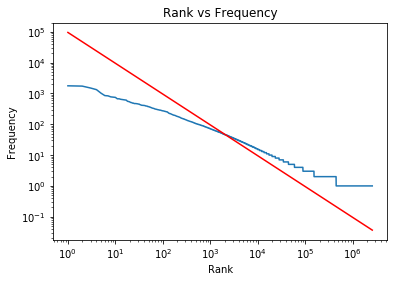

In [67]:
plt.loglog(sorted_trigrams[:,2], sorted_trigrams[:,1])
plt.loglog(sorted_trigrams[:,2], 0.025 * N/sorted_trigrams[:,2], c= 'r')
plt.xlabel("Rank")
plt.ylabel("Frequency")
plt.title("Rank vs Frequency")

Text(0, 0.5, 'Probability')

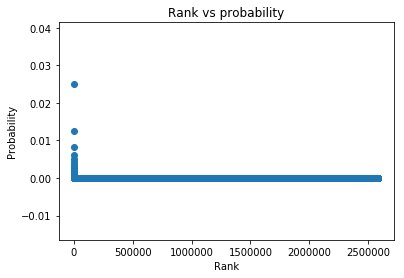

In [69]:
Pr = (sorted_trigrams[:,1] /N)
plt.scatter(sorted_trigrams[:,2], 0.025/sorted_trigrams[:,2])
plt.title("Rank vs probability")
plt.xlabel("Rank")
plt.ylabel("Probability")